## 4-4 勾配

In [1]:
import numpy as np

In [2]:
def function_2(x):
    return np.sum(x ** 2)

In [3]:
def numerical_gradient(f, x):
    """勾配を求める関数。NumPy配列xの各要素に対して数値微分を求める
    args:
        f: 関数
        x: NumPy配列
    """

    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # xと同じ形状の配列を生成

    print(f"{x.size=}")

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す
    return grad

引数の2乗和の計算  
$f(x_0, x_1) = x_0^2 + x_1^2$

In [4]:
print("(3,4)の勾配")
numerical_gradient(function_2, np.array([3.0, 4.0]))

(3,4)の勾配
x.size=2


array([6., 8.])

In [5]:
print("(0,2)の勾配")
numerical_gradient(function_2, np.array([0.0, 2.0]))

(0,2)の勾配
x.size=2


array([0., 4.])

In [6]:
print("(3,0)勾配")
numerical_gradient(function_2, np.array([3.0, 0.0]))

(3,0)勾配
x.size=2


array([6., 0.])

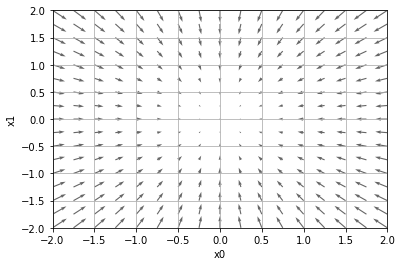

In [7]:
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x ** 2)
    else:
        return np.sum(x ** 2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


if __name__ == "__main__":
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.grid()
    plt.draw()
    plt.show()

### 4.4.1 勾配法

In [8]:
# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

### 問: $f(x_0, x_1)=x_0^2+x_1^2$の最小値を勾配法で求める

In [9]:
init_x = np.array([-3.0, 4.0])
print(init_x)

[-3.  4.]


In [10]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [11]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)

        x -= lr * grad
    return x, np.array(x_history)

In [12]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

$f(x_0, x_1)=x_0^2+x_1^2$の最小値を求める描画

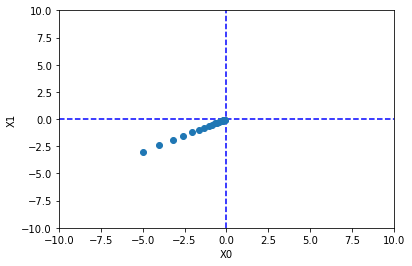

In [28]:
# init_x = np.array([-3.0, 4.0])
init_x = np.array([-5.0, -3.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
plt.plot([-10, 10], [0, 0], "--b")
plt.plot([0, 0], [-10, 10], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 学習率(lr)が高すぎる例

x=array([-1.5650224e+12, -1.5650224e+12])


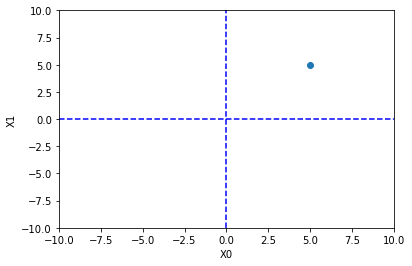

In [14]:
# init_x = np.array([-3.0, 4.0])
init_x = np.array([5.0, 5.0])
lr = 100
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(f"{x=}")
plt.plot([-10, 10], [0, 0], "--b")
plt.plot([0, 0], [-10, 10], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 学習率(lr)が低すぎる例

x=array([3.33803986, 3.33803986])


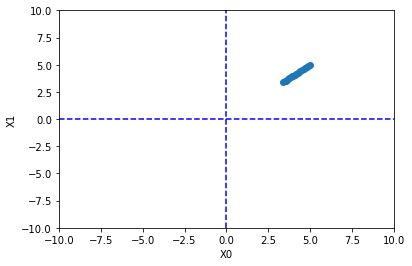

In [15]:
# init_x = np.array([-3.0, 4.0])
init_x = np.array([5.0, 5.0])
lr = 0.01
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print(f"{x=}")
plt.plot([-10, 10], [0, 0], "--b")
plt.plot([0, 0], [-10, 10], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 4.2.2 ニューラルネットワークに対する勾配

In [16]:
import os
import sys

from common.functions import cross_entropy_error, softmax
from common.gradient import numerical_gradient

sys.path.append(os.pardir)

In [17]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # ガウス分布で初期化

    def predict(self, x):
        """予測するためのメソッド
        """
        return np.dot(x, self.W)

    def loss(self, x, t):
        """損失関数を求めるメソッド
        """
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [18]:
net = simpleNet()
print(net.W)

[[-0.0125249   2.23864457  0.0084158 ]
 [-1.28529964  0.88316791 -0.37474475]]


In [19]:
x = np.array([0.6, 0.9])
print(f"{x=}")

x=array([0.6, 0.9])


In [20]:
p = net.predict(x)
print(f"{p=}")

p=array([-1.16428462,  2.13803786, -0.3322208 ])


In [21]:
np.argmax(p)  # 最大値のインデックス

1

In [22]:
t = np.array([0, 1, 0])  # 正解ラベル

In [23]:
net.loss(x, t)

0.11454264762480666

In [24]:
def f(W):
    return net.loss(x, t)

In [25]:
dW = numerical_gradient(f, net.W)

In [26]:
print(f"{dW=}")

dW=array([[ 0.01968908, -0.06493571,  0.04524663],
       [ 0.02953362, -0.09740356,  0.06786994]])
